In [57]:
import pandas as pd
import pyfolio as pf
%matplotlib inline
# silence warnings
import warnings
warnings.filterwarnings('ignore')

def handle_time(df,col):
    df[col] = pd.to_datetime(df[col]).dt.strftime("%Y-%m-%d %H:%M:%S")
    df[col] = pd.to_datetime(df[col])
    df = df.set_index(col, drop=True)
    return df


In [58]:

returns = pd.read_csv('result/returns.csv')
transactions = pd.read_csv('result/transactions.csv')
positions = pd.read_csv('result/positions.csv')
gross_lev = pd.read_csv('result/gross_lev.csv')

returns = handle_time(returns,'index')
transactions = handle_time(transactions, 'date')
positions = handle_time(positions,'Datetime')
gross_positions = handle_time(gross_lev,'index')

In [59]:
pystats_df = pf.timeseries.perf_stats(returns['return'], positions=positions, transactions=transactions)

In [60]:
pystats_df

Annual return          -0.433435
Cumulative returns     -0.497248
Annual volatility       0.812209
Sharpe ratio           -0.255206
Calmar ratio           -0.580201
Stability               0.744458
Max drawdown           -0.747043
Omega ratio             0.945500
Sortino ratio          -0.310442
Skew                   -2.112405
Kurtosis               11.074499
Tail ratio              0.923641
Daily value at risk    -0.103151
Gross leverage          0.414043
Daily turnover               inf
dtype: float64

Summary stats,All trades,Short trades
Total number of round_trips,187.00,187.00
Percent profitable,0.40,0.40
Winning round_trips,74.00,74.00
Losing round_trips,113.00,113.00
Even round_trips,0.00,0.00


PnL stats,All trades,Short trades
Total profit,$-36642.48,$-36642.48
Gross profit,$411257.00,$411257.00
Gross loss,$-447899.49,$-447899.49
Profit factor,$0.92,$0.92
Avg. trade net profit,$-195.95,$-195.95
Avg. winning trade,$5557.53,$5557.53
Avg. losing trade,$-3963.71,$-3963.71
Ratio Avg. Win:Avg. Loss,$1.40,$1.40
Largest winning trade,$22186.71,$22186.71
Largest losing trade,$-47406.56,$-47406.56


Duration stats,All trades,Short trades
Avg duration,0 days 16:10:54.550802139,0 days 16:10:54.550802139
Median duration,0 days 09:00:00,0 days 09:00:00
Longest duration,4 days 02:00:00,4 days 02:00:00
Shortest duration,0 days 01:00:00,0 days 01:00:00


Return stats,All trades,Short trades
Avg returns all round_trips,NaN,NaN
Avg returns winning,NaN,NaN
Avg returns losing,NaN,NaN
Median returns all round_trips,NaN,NaN
Median returns winning,NaN,NaN
Median returns losing,NaN,NaN
Largest winning trade,NaN,NaN
Largest losing trade,NaN,NaN


Symbol stats,btc_day
Avg returns all round_trips,NaN
Avg returns winning,NaN
Avg returns losing,NaN
Median returns all round_trips,NaN
Median returns winning,NaN
Median returns losing,NaN
Largest winning trade,NaN
Largest losing trade,NaN


Profitability (PnL / PnL total) per name,
symbol,
btc_day,100.00%


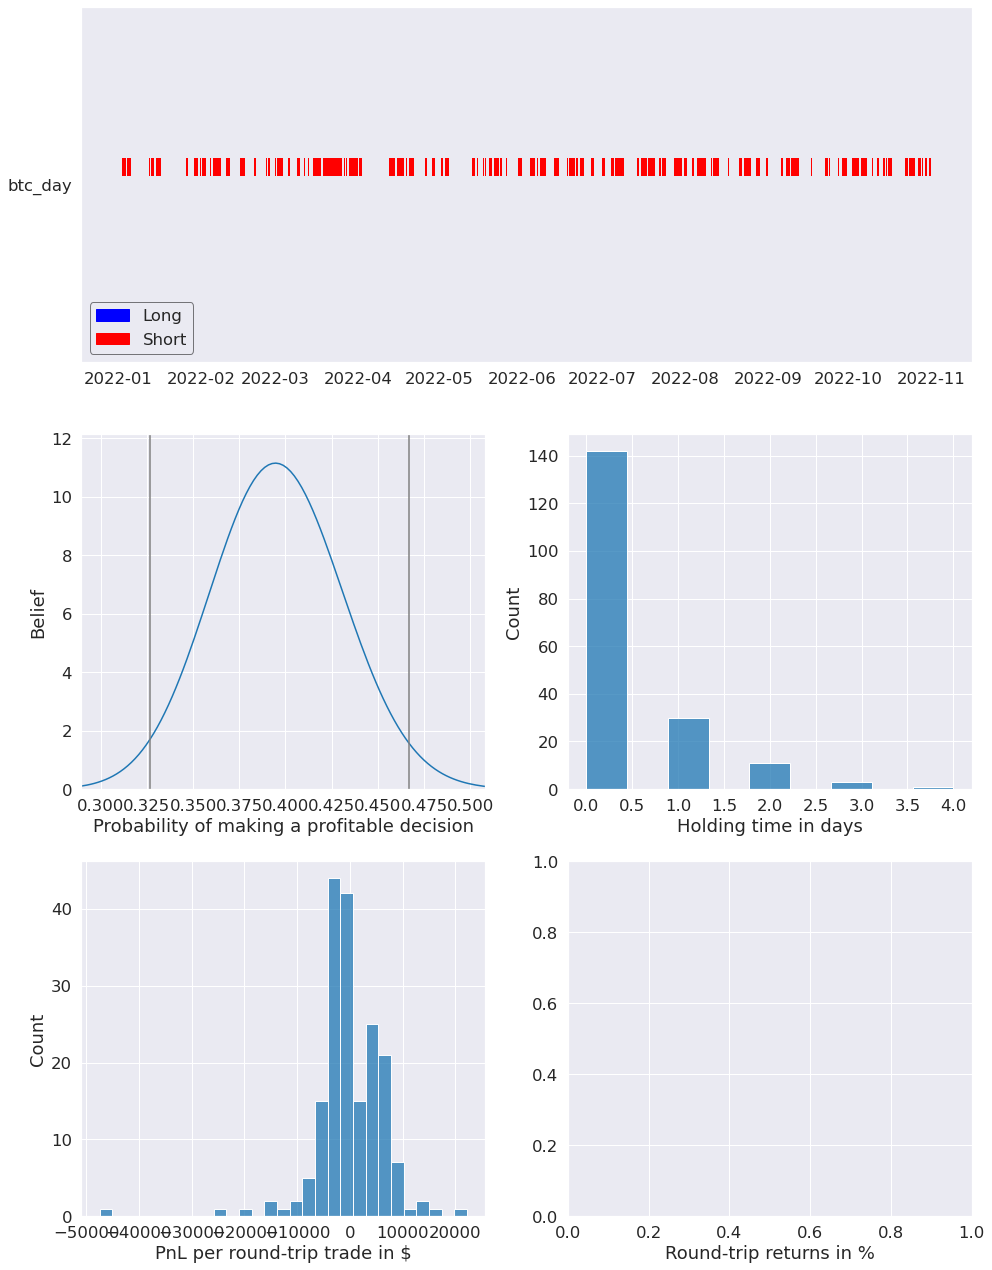

In [61]:
pf.create_round_trip_tear_sheet(returns, positions, transactions)

Start date,2022-07-01
End date,2022-11-01
Total months,5
,Backtest
Annual return,-59.086%
Cumulative returns,-35.581%
Annual volatility,43.012%
Sharpe ratio,-1.85
Calmar ratio,-1.44
Stability,0.42
Max drawdown,-40.938%


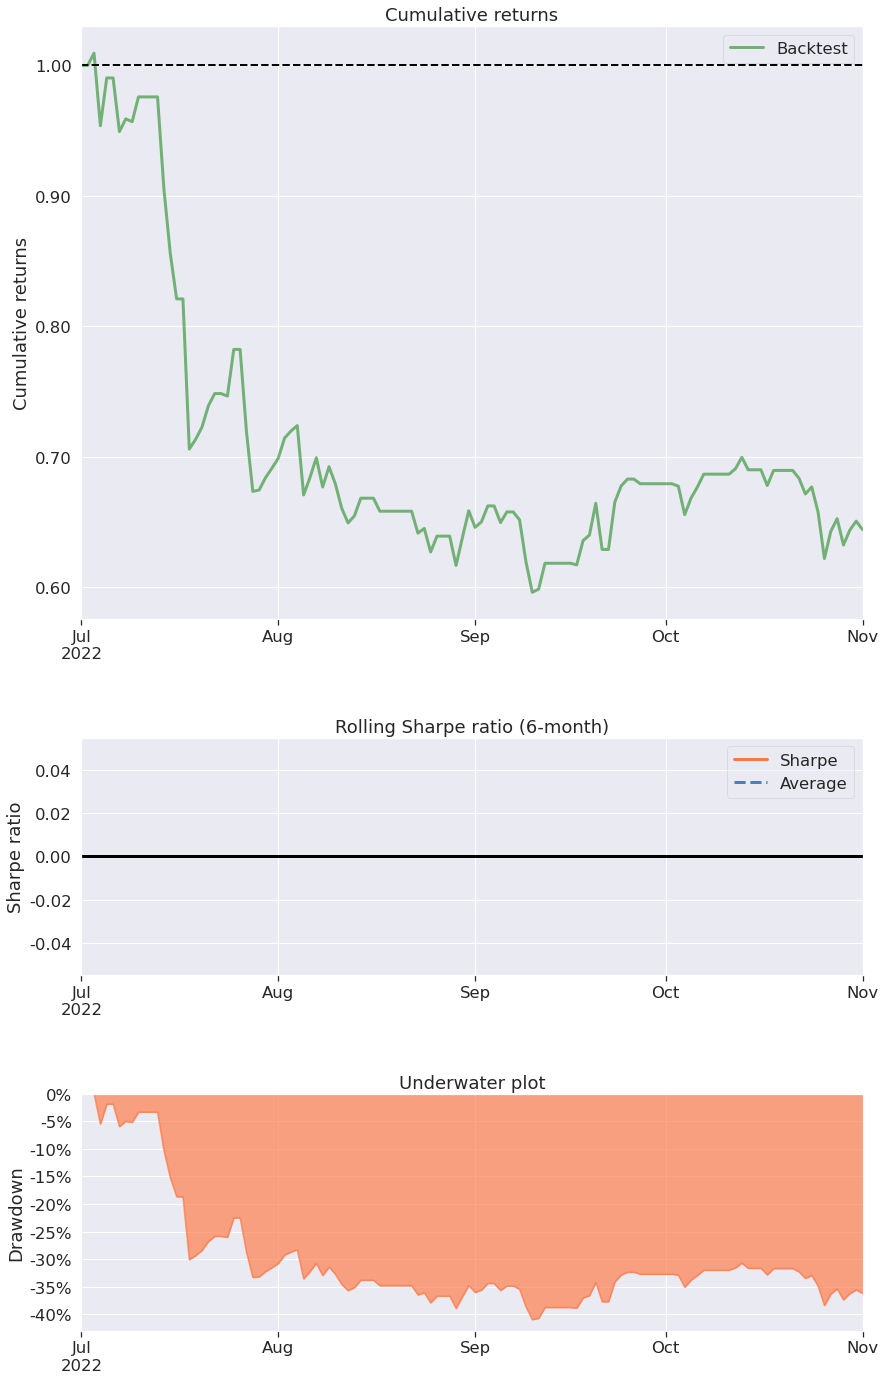

In [43]:
pf.create_simple_tear_sheet(returns['return'])

In [33]:
returns['return'].index.min()

Timestamp('2022-07-01 00:00:00')

Start date,2022-07-01
End date,2022-11-01
Total months,5
,Backtest
Annual return,-59.086%
Cumulative returns,-35.581%
Annual volatility,43.012%
Sharpe ratio,-1.85
Calmar ratio,-1.44
Stability,0.42
Max drawdown,-40.938%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,40.94,2022-07-03,2022-09-10,NaT,NaN
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


ConversionError: Failed to convert value(s) to axis units: (NaT, Timestamp('2022-11-01 00:00:00'))

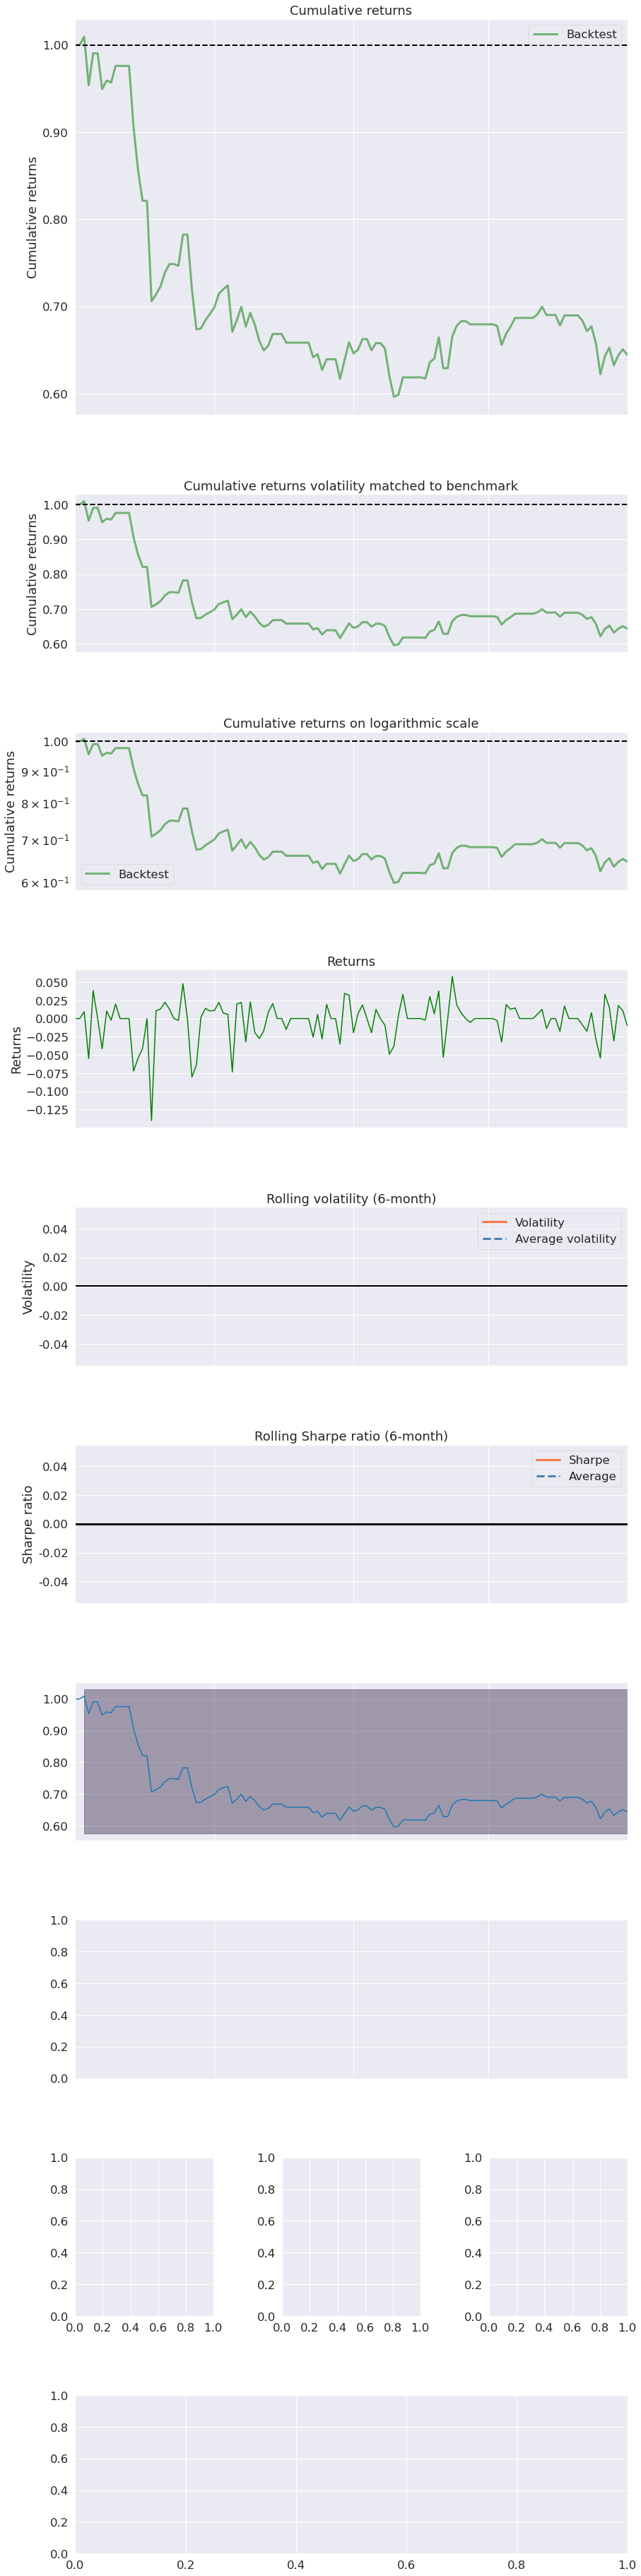

In [34]:
pf.create_returns_tear_sheet(returns['return'], 
                            #  live_start_date='2022-4-1'
                             )

In [11]:
# pf.create_full_tear_sheet(returns['return'], positions=positions, transactions=transactions)


# pf.create_returns_tear_sheet(returns['return'], 
#                             #  live_start_date='2022-4-1'
#                              )


# pf.create_full_tear_sheet(returns['return'], positions=positions, transactions=transactions,
#                         #   live_start_date='2022-04-01', 
#                           hide_positions=True)